## CB02-4 Part Three: Building a MLP using Torch
recall:
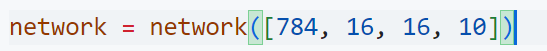

### 01 Buiding MLP

In [3]:
import torch

class mlp(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()
        
        self.layers = torch.nn.Sequential(
            
            # 1st hidden layer
            torch.nn.Linear(num_inputs, 16),
            torch.nn.ReLU(),

            # 2nd hidden layer
            torch.nn.Linear(16, 16),
            torch.nn.ReLU(),

            # output layer
            torch.nn.Linear(16, num_outputs)
        )

    def forward(self, x):
        logits = self.layers(x)
        return logits

In [4]:
model = mlp(784, 10)
model

mlp(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=10, bias=True)
  )
)

Note:
Using
Sequential is not required, while by using Sequential, we just have to call the self.layers instead of calling each
layer individually in the NeuralNetwork's forward method.

### 02 Attributes of the model

### Layers, and corresponding weights & biases

In [6]:
# check layers
layers = model.layers
layers

Sequential(
  (0): Linear(in_features=784, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)

In [7]:
layers[0], layers[0].weight, layers[0].bias

(Linear(in_features=784, out_features=16, bias=True),
 Parameter containing:
 tensor([[ 0.0290, -0.0157,  0.0061,  ..., -0.0117,  0.0022, -0.0158],
         [-0.0281, -0.0295, -0.0084,  ..., -0.0030,  0.0217, -0.0253],
         [-0.0051, -0.0111,  0.0037,  ..., -0.0210, -0.0204, -0.0344],
         ...,
         [-0.0338,  0.0185, -0.0199,  ..., -0.0281,  0.0080,  0.0031],
         [ 0.0235, -0.0219, -0.0053,  ...,  0.0247,  0.0330, -0.0234],
         [-0.0336, -0.0028, -0.0044,  ..., -0.0140,  0.0157,  0.0099]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0212,  0.0079, -0.0163,  0.0174, -0.0279,  0.0168,  0.0088,  0.0334,
          0.0304,  0.0223, -0.0143,  0.0140, -0.0089, -0.0118, -0.0322, -0.0355],
        requires_grad=True))

In [8]:
# shape of weights and biases
# weights: 784 x 16
# biases: 16
layers[0].weight.shape, layers[0].bias.shape

(torch.Size([16, 784]), torch.Size([16]))

### Parameters

In [10]:
model.parameters()

<generator object Module.parameters at 0x000002A78DC718C0>

In [11]:
# check parameters: trainable weights and biases
paras = [p for p in model.parameters()]
len(paras), paras[0], paras[0].shape # paras[0] is the weight of the 1st layer

(6,
 Parameter containing:
 tensor([[ 0.0290, -0.0157,  0.0061,  ..., -0.0117,  0.0022, -0.0158],
         [-0.0281, -0.0295, -0.0084,  ..., -0.0030,  0.0217, -0.0253],
         [-0.0051, -0.0111,  0.0037,  ..., -0.0210, -0.0204, -0.0344],
         ...,
         [-0.0338,  0.0185, -0.0199,  ..., -0.0281,  0.0080,  0.0031],
         [ 0.0235, -0.0219, -0.0053,  ...,  0.0247,  0.0330, -0.0234],
         [-0.0336, -0.0028, -0.0044,  ..., -0.0140,  0.0157,  0.0099]],
        requires_grad=True),
 torch.Size([16, 784]))

In [12]:
layers[0].weight == paras[0]

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [13]:
# paras[1] is the bias of the 1st layer
layers[0].bias == paras[1], paras[1].shape

(tensor([True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True]),
 torch.Size([16]))

In [14]:
# more tests
layers, len(paras)

(Sequential(
   (0): Linear(in_features=784, out_features=16, bias=True)
   (1): ReLU()
   (2): Linear(in_features=16, out_features=16, bias=True)
   (3): ReLU()
   (4): Linear(in_features=16, out_features=10, bias=True)
 ),
 6)

In [15]:
layers[-1].weight == paras[-2], paras[-2].shape # 16 x 10.T

(tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
          True, True, True, True],
         [True, True, True, True, True, True, True, True, True, True, True, True,
          True, True, True, True],
         [True, True, True, True, True, True, True, True, True, True, True, True,
          True, True, True, True],
         [True, True, True, True, True, True, True, True, True, True, True, True,
          True, True, True, True],
         [True, True, True, True, True, True, True, True, True, True, True, True,
          True, True, True, True],
         [True, True, True, True, True, True, True, True, True, True, True, True,
          True, True, True, True],
         [True, True, True, True, True, True, True, True, True, True, True, True,
          True, True, True, True],
         [True, True, True, True, True, True, True, True, True, True, True, True,
          True, True, True, True],
         [True, True, True, True, True, True, True, True, True, 

In [16]:
paras[-1].numel()

10

In [17]:
# check the number of parameters
num_params = sum(p.numel() for p in model.parameters())
num_params

13002

## sum for now
1. model.parametes() stores all trainable paras that "requires_grad = True".
2. automatically set requires_grad = True while using Linear class
3. all paras are initialized randomly. Seed can be set.
eg. torch.manual_seed(9)

    model = mlp(784, 10)

### 03 Using the Model: Forward Pass(Inference)

In [18]:
model

mlp(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [19]:
torch.manual_seed(0)
input_data = torch.randn(3, 784) # 3 sample with 784 features

In [20]:
out = model(input_data)
out, out.shape

(tensor([[-0.2453,  0.1813,  0.1580, -0.0945, -0.0459, -0.0542, -0.1011, -0.2777,
          -0.0809, -0.3793],
         [-0.1804,  0.2557,  0.1123, -0.0775, -0.1141, -0.0087,  0.0722, -0.2776,
           0.0381, -0.4321],
         [-0.3105,  0.2838,  0.2473,  0.0782, -0.1984,  0.0119, -0.0292, -0.2770,
          -0.1316, -0.4771]], grad_fn=<AddmmBackward0>),
 torch.Size([3, 10]))

### Turn off autograd when inference
does not keep track of gradients

In [21]:
with torch.no_grad():
    out = model(input_data)
out

tensor([[-0.2453,  0.1813,  0.1580, -0.0945, -0.0459, -0.0542, -0.1011, -0.2777,
         -0.0809, -0.3793],
        [-0.1804,  0.2557,  0.1123, -0.0775, -0.1141, -0.0087,  0.0722, -0.2776,
          0.0381, -0.4321],
        [-0.3105,  0.2838,  0.2473,  0.0782, -0.1984,  0.0119, -0.0292, -0.2770,
         -0.1316, -0.4771]])